In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [ ]:
X,y = make_blobs(centers=3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


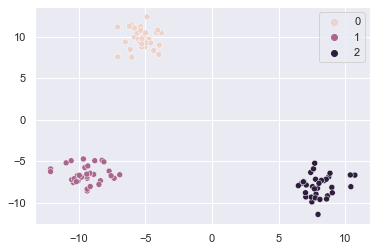

In [ ]:
plt.figure()
sns.set()
sns.scatterplot(X[:,0],X[:,1], hue = y)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cluster = KMeans(n_clusters=3)
cluster.fit(X)

KMeans(n_clusters=3)

In [ ]:
centers = cluster.cluster_centers_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


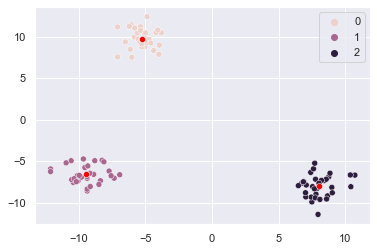

In [ ]:
plt.figure()
sns.set()
sns.scatterplot(X[:,0],X[:,1], hue = y)
sns.scatterplot(centers[:,0],centers[:,1],color = 'red' )
plt.show()

In [ ]:
query = np.array([-2.45,3.5])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


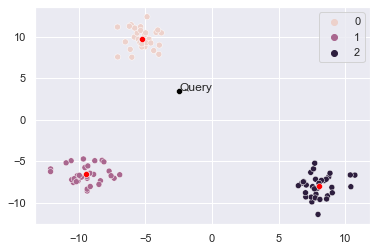

In [ ]:
plt.figure()
sns.set()
sns.scatterplot(X[:,0],X[:,1], hue = y)
sns.scatterplot(centers[:,0],centers[:,1],color = 'red' )
sns.scatterplot([query[0]],[query[1]],color = 'black')
plt.text(query[0],query[1],'Query')
plt.show()

In [ ]:
cluster.predict(query.reshape(-1,2))

array([0])

In [ ]:
sse = [] 
for k in range(1,10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(X)
    sse.append(cluster.inertia_)
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


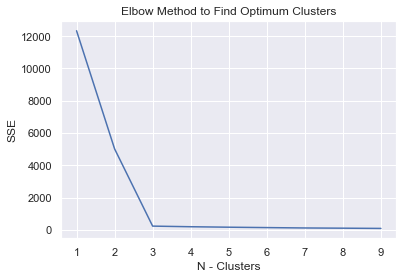

In [ ]:
plt.figure()
sns.set()
sns.lineplot(range(1,10),sse)
plt.title('Elbow Method to Find Optimum Clusters')
plt.xlabel('N - Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
cluster = KMeans(n_clusters=3)
cluster.fit(X)
y_pred = cluster.predict(X)
silhouette_score(X,y_pred)

In [ ]:
sil_score = []
n_clust = []
for k in range(2,10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(X)
    y_pred = cluster.predict(X)
    sil_score.append(silhouette_score(X,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


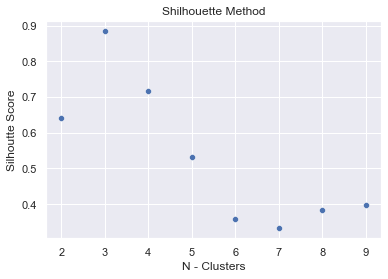

In [ ]:
plt.figure()
sns.set()
sns.scatterplot(range(2,10),sil_score)
plt.title('Shilhouette Method')
plt.xlabel('N - Clusters')
plt.ylabel('Silhoutte Score')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
del df['CustomerID']

In [ ]:
df['Gender'] = np.where(df['Gender'] == 'Male',0,1)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
SSE = []
Sil_Score = []
n_clusters = range(2,10)
for k in n_clusters:
    cluster = KMeans(n_clusters=k)
    cluster.fit(df)
    SSE.append(cluster.inertia_)
    y_pred = cluster.predict(df)
    sil_score = silhouette_score(df,y_pred)
    Sil_Score.append(sil_score)
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


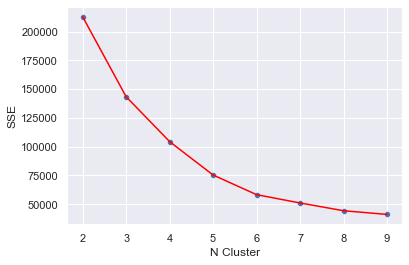

In [ ]:
plt.figure()
sns.scatterplot(n_clusters,SSE)
sns.lineplot(n_clusters,SSE,color = 'red')
plt.xlabel('N Cluster')
plt.ylabel('SSE')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


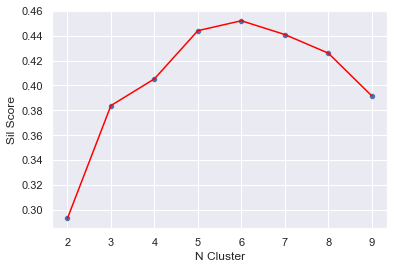

In [ ]:
plt.figure()
sns.scatterplot(n_clusters,Sil_Score)
sns.lineplot(n_clusters,Sil_Score,color = 'red')
plt.xlabel('N Cluster')
plt.ylabel('Sil Score')
plt.show()

In [ ]:
cluster = KMeans(n_clusters=6)
cluster.fit(df)
y_pred = cluster.predict(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

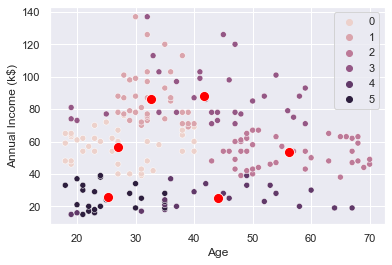

In [ ]:
plt.plot()
sns.scatterplot(x='Age',y='Annual Income (k$)',hue= y_pred,data=df)
sns.scatterplot(cluster.cluster_centers_[:,1],cluster.cluster_centers_[:,2],color='red',s=100)

In [ ]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df)

In [ ]:
SSE = []
Sil_Score = []
n_clusters = range(2,20)
for k in n_clusters:
    cluster = KMeans(n_clusters=k)
    cluster.fit(df_scaler)
    SSE.append(cluster.inertia_)
    y_pred = cluster.predict(df_scaler)
    sil_score = silhouette_score(df_scaler,y_pred)
    Sil_Score.append(sil_score)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


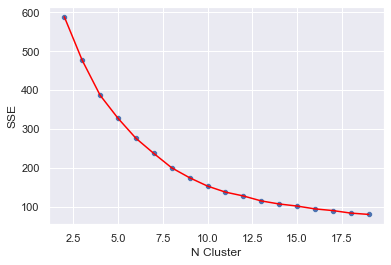

In [ ]:
plt.figure()
sns.scatterplot(n_clusters,SSE)
sns.lineplot(n_clusters,SSE,color = 'red')
plt.xlabel('N Cluster')
plt.ylabel('SSE')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


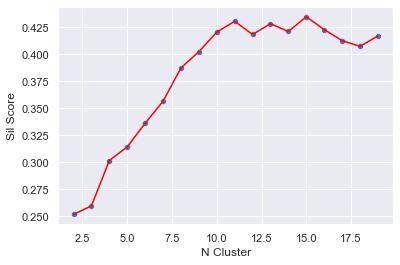

In [ ]:
plt.figure()
sns.scatterplot(n_clusters,Sil_Score)
sns.lineplot(n_clusters,Sil_Score,color = 'red')
plt.xlabel('N Cluster')
plt.ylabel('Sil Score')
plt.show()